In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import folium
from itertools import combinations
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN
from pointpats import PoissonPointProcess, PointPattern
from scipy.spatial.distance import cdist
import warnings
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore')

In [72]:
csv_name = "Baobab Data - Baobabs"
bab = pd.read_csv(f"csvs/{csv_name}.csv")

## Mapping Baobabs and looking for visual trends

In [73]:
# Import baobab data 
bab_map = bab[['Specimen ID', 'Longitude', 'Latitude', 'Species', 'Surrounding vegetation', 'Marary factor', 'Fokontany / PN']]
bab_map = bab_map.dropna(subset=['Longitude', 'Latitude'])
bab_map

,Specimen ID,Longitude,Latitude,Species,Surrounding vegetation,Marary factor,Fokontany / PN
0,KMEAS1,-22.048640,43.265120,grandidieri,dry brush,NaN,Andavadoaka
1,KBUNCH,-22.048660,43.265280,grandidieri,dry brush,3.0,Andavadoaka
2,KB2,-22.048040,43.265110,grandidieri,dry brush,1.0,Andavadoaka
3,KB3,-22.047200,43.266160,grandidieri,dry brush,NaN,Andavadoaka
4,KB4,-22.047040,43.266170,grandidieri,dry brush,1.0,Andavadoaka
5,KB5,-22.046770,43.265970,grandidieri,dry brush,3.0,Andavadoaka
7,NS1,-22.035350,43.263540,grandidieri,"dry brush, sono",1.0,Andavadoaka
8,NS2,-22.034930,43.264000,grandidieri,"sono, laro, nonoka",1.0,Andavadoaka
9,NS3,-22.034880,43.264090,grandidieri,"sono, laro, nonoka",1.0,Andavadoaka
10,NS4,-22.034780,43.264220,grandidieri,"sono, laro, nonoka",0.0,Andavadoaka


In [109]:
# Create Map
map = folium.Map(location=[-22.0, 43.3], zoom_start=10)

# Add markers with corresponding letters in popups
for index, row in bab_map.iterrows():
    iframe = folium.IFrame(f"Specimen ID: {row['Specimen ID']}<br>Fokontany: {row['Fokontany / PN']}<br>Species: {row['Species']}<br>Marary Factor: {row['Marary factor']}<br>Surrounding Vegetation: {row['Surrounding vegetation']}")
    popup1 = folium.Popup(iframe, min_width=240, max_width=250) 
    icon1 = folium.Icon(color={3.0: 'red', 2.0: 'orange', 1.0: 'beige', 0.0: 'green'}.get(row['Marary factor'], 'blue'))
    folium.Marker(location=[row['Longitude'], row['Latitude']], popup = popup1, icon=icon1).add_to(map)

map

### Results: 

Trends with Baobab Species:
- The species grandidieri appears to be prevalent throughout all Fokontanies.
- However, based on the data, the species rubrostipa can only be seen in Ankindranoke.

Trends with Bark Pattern: 
- In Ankindranoke / Mikea Park, there is no explicit instance of the bark pattern, with a Marary factor of 0.0 or unknown appearing.
- In Ankindranoke, there is predominantly no appearence of the bark pattern, with minimal instances of the Marary factor being at least 1.0.
- There are 3 main clusters of baobab trees recorded in Ambalorao. In the southernmost cluster, there is predominantly little to no bark pattern, with a few instances of a marary factor of at least 1.0. In the slightly northern cluster, baobabs infected with any amount of bark pattern constitute more than 50%. In the northernmost cluster, there is little to no bark pattern, with a few instances of a marary factor greater than 1.0
- There are 2 main clusters of baobab trees recorded in Andavadoaka. In both clusters the bark pattern is prevalent.
- There are 2 main clusters of baobab trees recorded in Antsatsamory. In the southern cluster, roughly half of the baobabs are infected with the bark pattern, with roughly half of the infected exhibiting a marary factor of 3.0. In the northern cluster, 2/3 of the baobabs are infected with the bark pattern, with 1/3 of the infected exhibiting a marary factor of 3.0 and the other 1/3 exhibiting a marary factor of 1.0.
- There is only one baobab recorded in Belavenoke with no bark pattern.

Overall, the bark pattern appears to not be as pervasive further south in the Ankindranoke and Ankindranoke / Mikea Park regions while it tends to gradually become more widespread in the more northern regions.

## Ripley's K for Marary Pattern for all clusters of each Fokontany

In [52]:
bab_K = bab[['Fokontany / PN', 'Marary factor', 'Longitude', 'Latitude']]
bab_K = bab_K[bab_K['Marary factor'] >= 1.0].dropna(subset=['Longitude', 'Latitude'])
Andavadoaka = bab_K[bab_K['Fokontany / PN'] == 'Andavadoaka'].reset_index(drop=True)
Ambalorao = bab_K[bab_K['Fokontany / PN'] == 'Ambalorao'].reset_index(drop=True)
Antsatsamory = bab_K[bab_K['Fokontany / PN'] == 'Antsatsamory'].reset_index(drop=True)
Ankindranoke = bab_K[bab_K['Fokontany / PN'] == 'Ankindranoke'].reset_index(drop=True)
Ankindranoke_Mikea_Park = bab_K[bab_K['Fokontany / PN'] == 'Ankindranoke / Mikea Park'].reset_index(drop=True)
Belavenoke = bab_K[bab_K['Fokontany / PN'] == 'Belavenoke'].reset_index(drop=True)

In [53]:
def ripleys_K(df, min_samples = 2):
    df = df.copy()
    
    # Save dataframe name
    name = df.loc[0, "Fokontany / PN"]
    
    if name == 'Andavadoaka':
        eps = 0.00001
    elif name == 'Ambalorao':
        eps = 0.000023
    elif name == 'Antsatsamory':
        eps = 0.00001
    elif name == 'Ankindranoke':
        eps = 0.00005
    else:
        raise ValueError(f"Not enough samples in {name} to perform Ripley's K")
    
    # Apply DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(df[['Latitude', 'Longitude']]))
    df['Cluster'] = db.labels_

    # Define colormap and normalize
    cmap = plt.colormaps.get_cmap('rainbow')
    norm = Normalize(vmin=df['Cluster'].min(), vmax=df['Cluster'].max())
    
    # Define colors for clusters and noise
    color_map = {i: color for i, color in enumerate(['Red', 'Green', 'Blue', 'Yellow', 'Cyan', 'Magenta', 'Black'])}
    color_map[-1] = 'Gray'  # Color for noise
    
    # Map cluster labels to colors
    df['Color'] = df['Cluster'].map(color_map)
    
    # Plot
    scan_map = plt.figure(figsize=(10, 7))
    scan_map = plt.scatter(df['Longitude'], df['Latitude'], c=df['Color'], marker='o')
    scan_map = plt.xlabel('Longitude')
    scan_map = plt.ylabel('Latitude')
    scan_map = plt.title('DBSCAN Clusters')
    
    # Create legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markersize=10, markerfacecolor=color_map[i]) for i in np.unique(df['Cluster']) if i != -1]
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label='Noise', markersize=10, markerfacecolor='Gray'))
    scan_map = plt.legend(handles=handles, title='Clusters')
    scan_map = plt.show()

    # Do Ripley's K for each cluster
    for cluster_id in np.unique(df['Cluster']):
        if cluster_id == -1:
            continue  # Skip noise points

        cluster_data = df[df['Cluster'] == cluster_id]
    
        if len(cluster_data) > 1:  # Ensure there's enough data
            coords = cluster_data[['Longitude', 'Latitude']].values
            
            # Calculate pairwise distances
            distances = cdist(coords, coords, metric='euclidean')
            distances = distances[np.triu_indices(len(distances), 1)]  # Upper triangle without diagonal
            
            # Radii range
            radii = np.linspace(0, np.max(distances), 100)

            # Compute Ripley's K function
            area = np.ptp(cluster_data[['Longitude', 'Latitude']].values, axis=0).prod()
            k_obs = np.array([np.sum(distances <= r) for r in radii]) * area / len(coords)**2
            
            # Calculate the expected K function (Poisson process)
            expected_K = np.pi * radii**2
            
            # Plot results
            kmap = plt.figure(figsize=(13, 5))
            kmap = plt.plot(radii, k_obs, label="Observed K(r)")
            kmap = plt.plot(radii, expected_K, '--', label="Expected K(r)")
            kmap = plt.fill_between(radii, expected_K * 0.95, expected_K * 1.05, color='gray', alpha=0.3, label="Confidence Interval")
            kmap = plt.title(f"Ripley's K Function for Marary Factor of {color_map[cluster_id]} Cluster in {name}")
            kmap = plt.xlabel("Distance r")
            kmap = plt.ylabel("K(r)")
            kmap = plt.legend()
            plt.show()
    
    display(df)

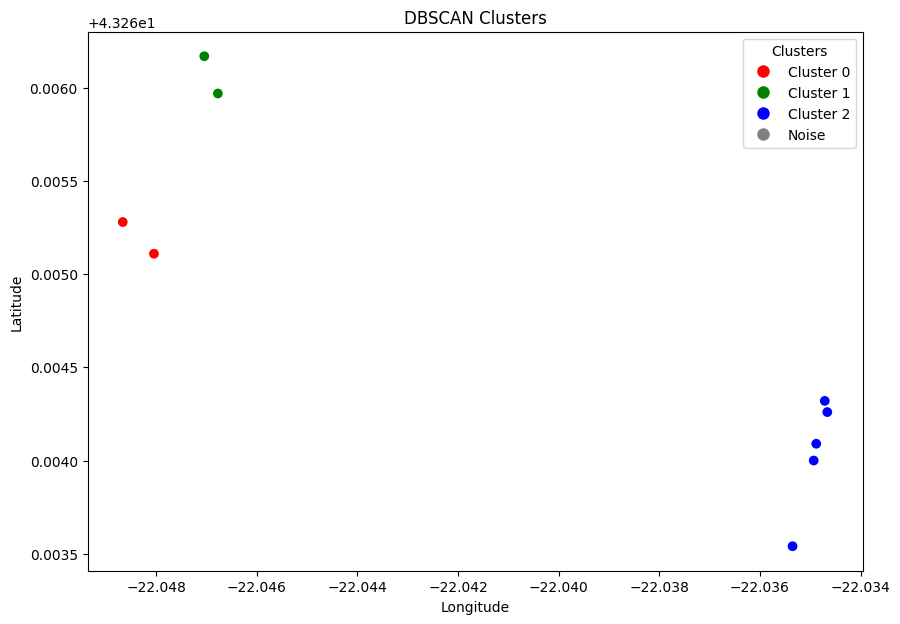

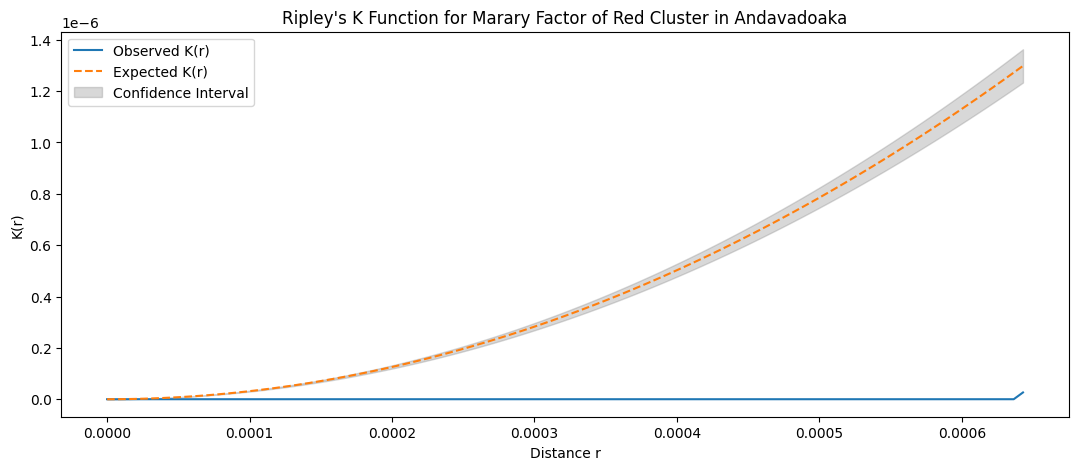

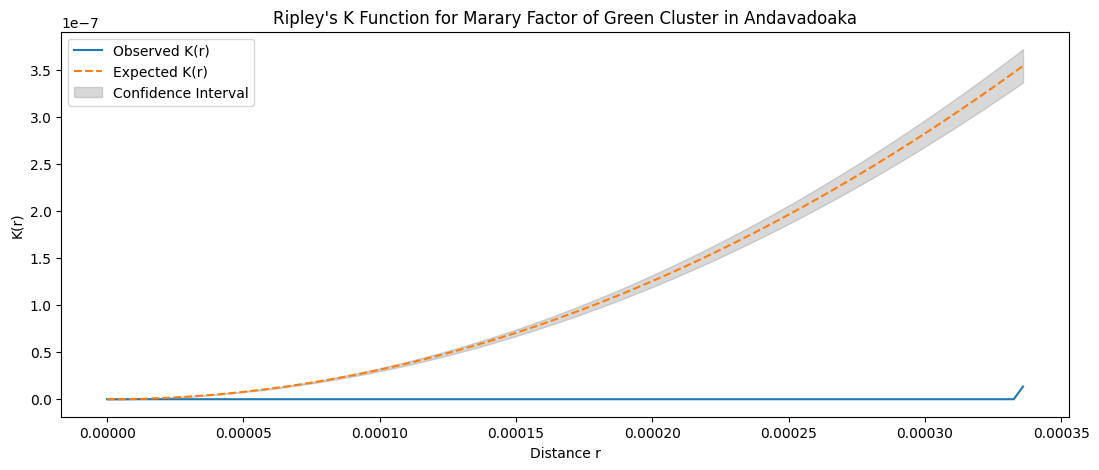

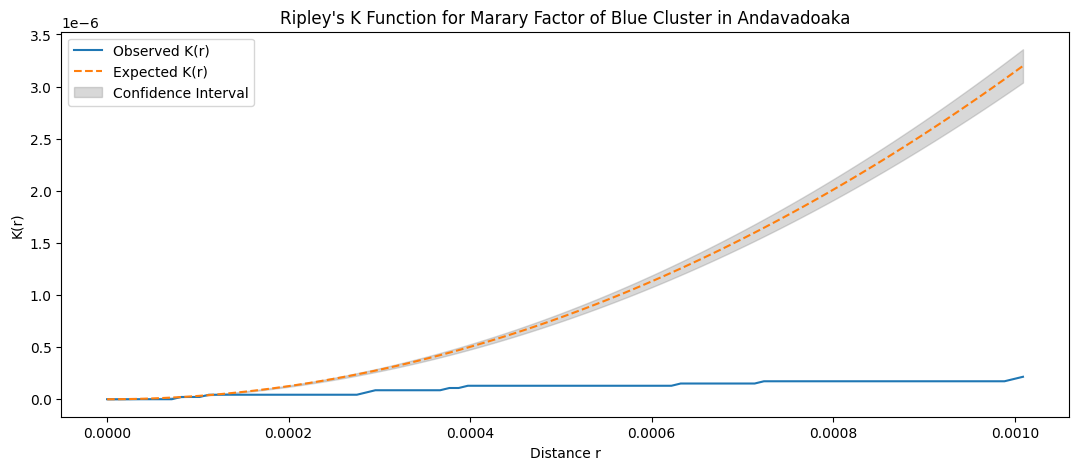

,Fokontany / PN,Marary factor,Longitude,Latitude,Cluster,Color
0,Andavadoaka,3.0,-22.04866,43.26528,0,Red
1,Andavadoaka,1.0,-22.04804,43.26511,0,Red
2,Andavadoaka,1.0,-22.04704,43.26617,1,Green
3,Andavadoaka,3.0,-22.04677,43.26597,1,Green
4,Andavadoaka,1.0,-22.03535,43.26354,2,Blue
5,Andavadoaka,1.0,-22.03493,43.26400,2,Blue
6,Andavadoaka,1.0,-22.03488,43.26409,2,Blue
7,Andavadoaka,2.0,-22.03466,43.26426,2,Blue
8,Andavadoaka,2.0,-22.03471,43.26432,2,Blue


In [54]:
ripleys_K(Andavadoaka, 2)

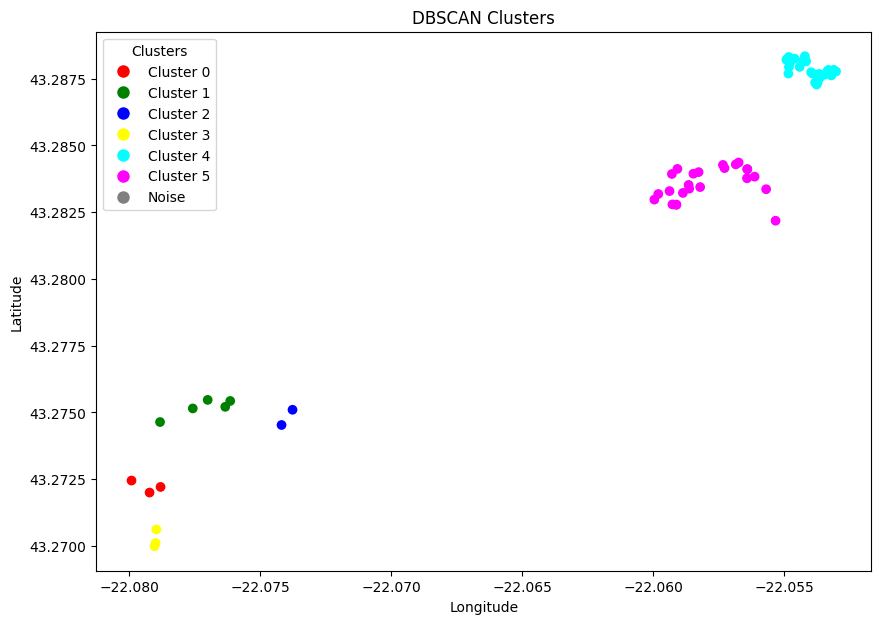

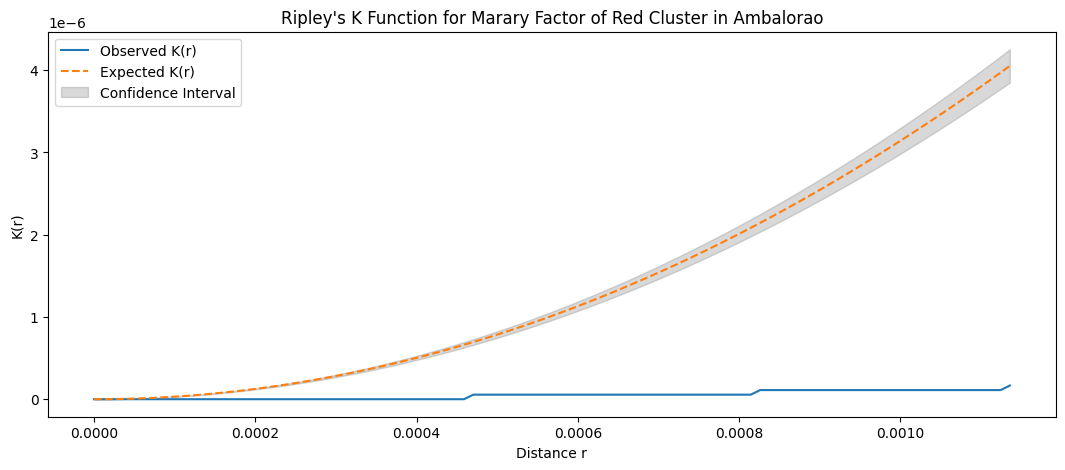

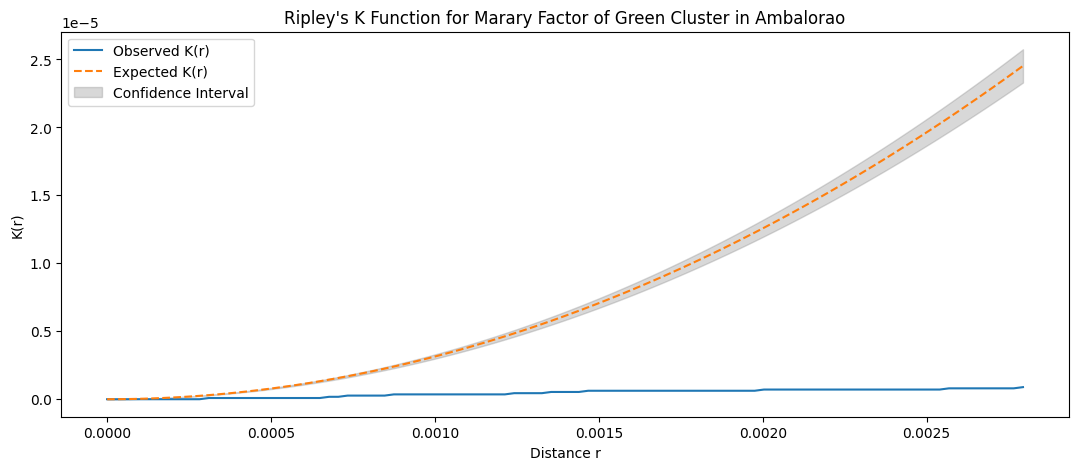

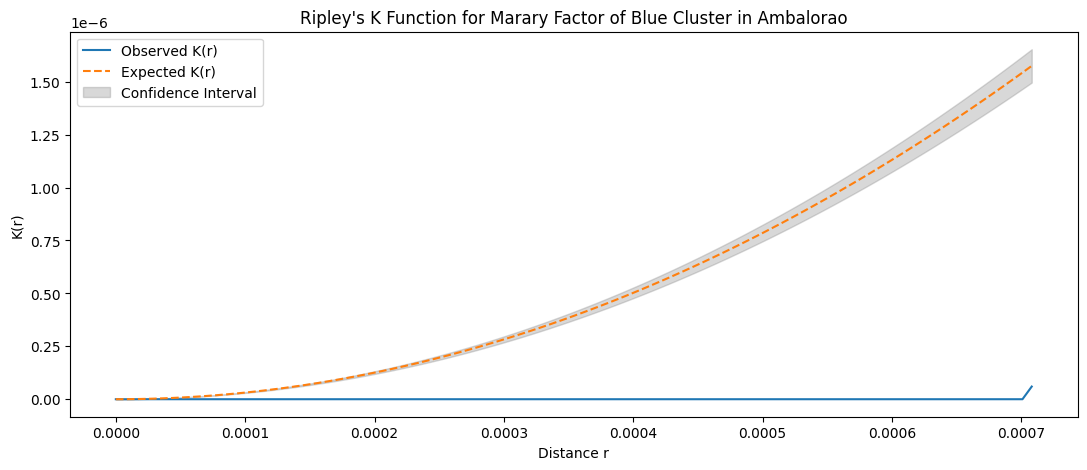

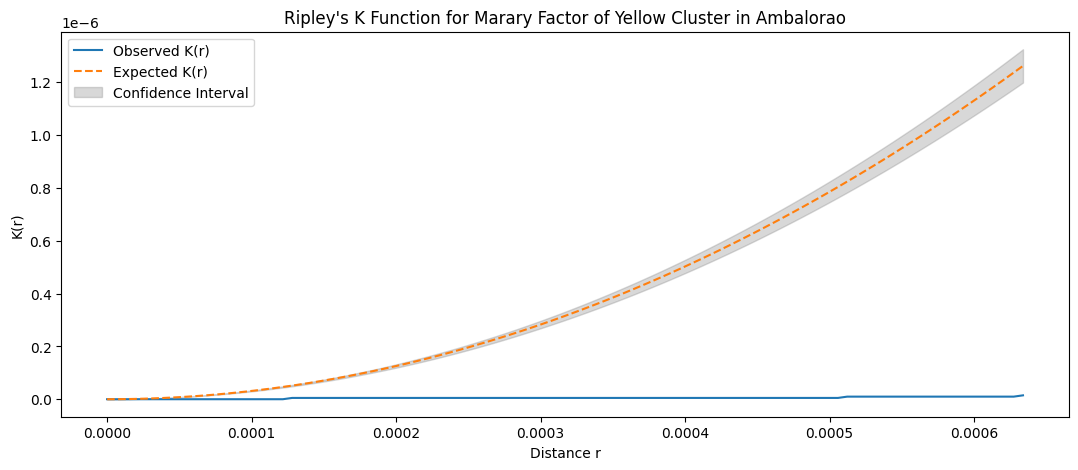

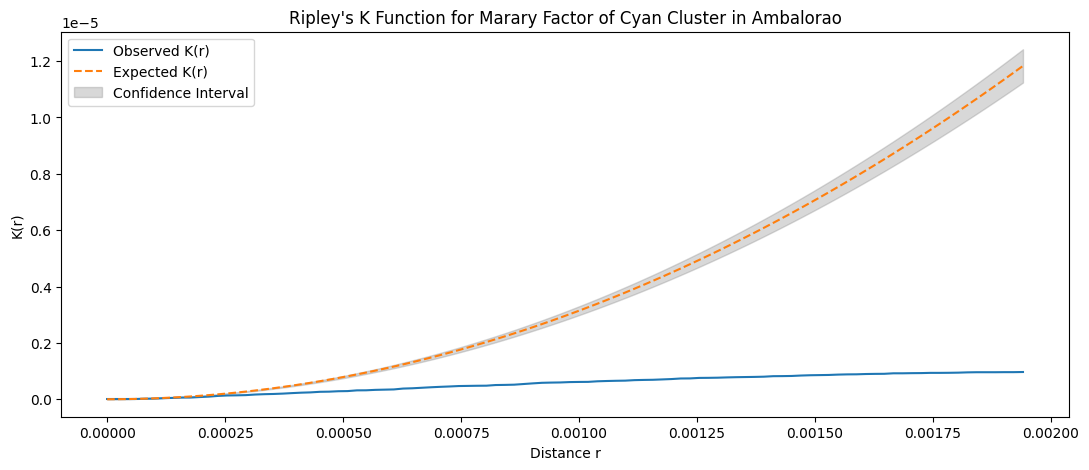

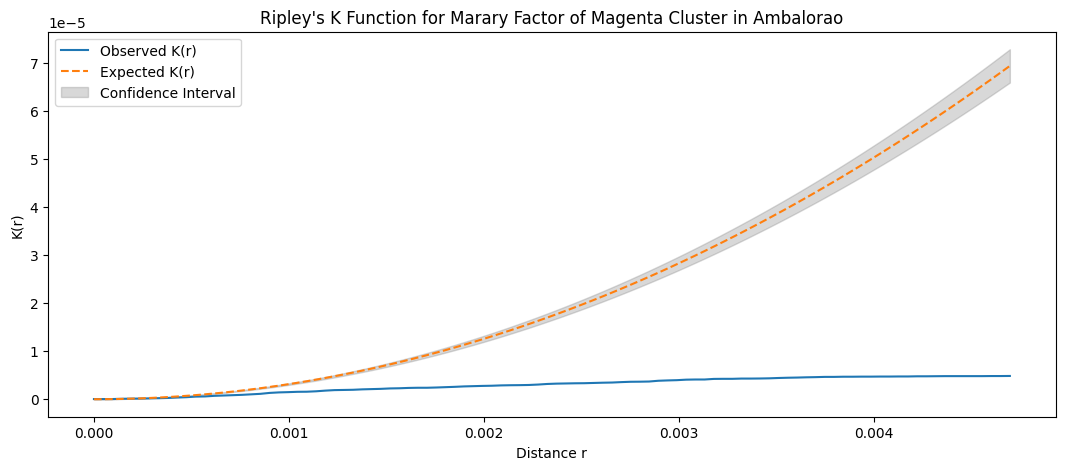

,Fokontany / PN,Marary factor,Longitude,Latitude,Cluster,Color
0,Ambalorao,2.0,-22.07881,43.27221,0,Red
1,Ambalorao,3.0,-22.07992,43.27245,0,Red
2,Ambalorao,3.0,-22.07923,43.27200,0,Red
3,Ambalorao,3.0,-22.07883,43.27464,1,Green
4,Ambalorao,2.0,-22.07758,43.27515,1,Green
5,Ambalorao,2.0,-22.07615,43.27543,1,Green
6,Ambalorao,3.0,-22.07634,43.27521,1,Green
7,Ambalorao,1.0,-22.07701,43.27547,1,Green
8,Ambalorao,2.0,-22.07377,43.27510,2,Blue
9,Ambalorao,1.0,-22.07419,43.27453,2,Blue


In [55]:
ripleys_K(Ambalorao)

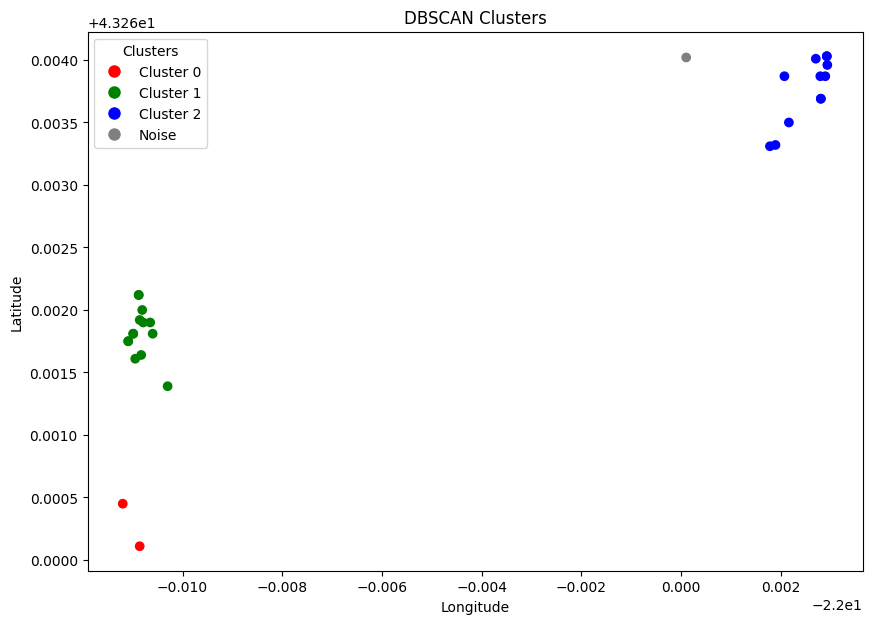

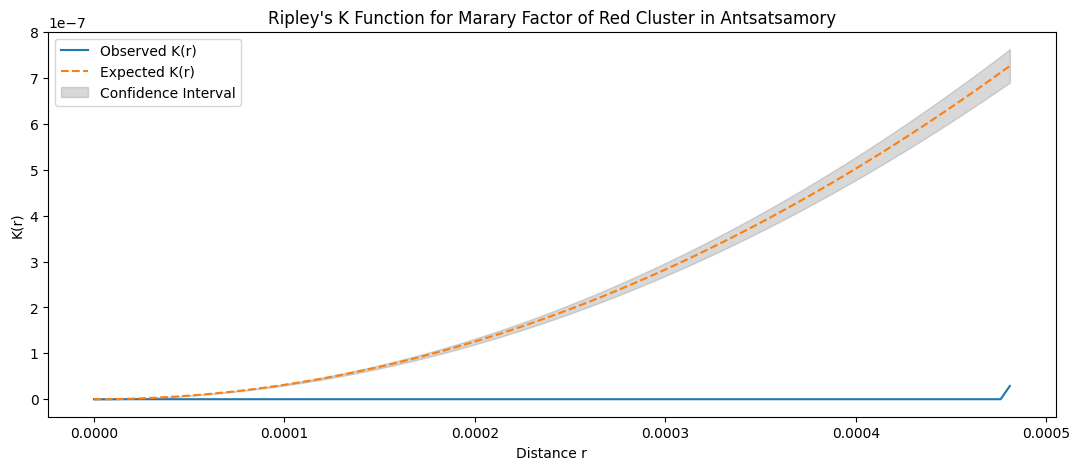

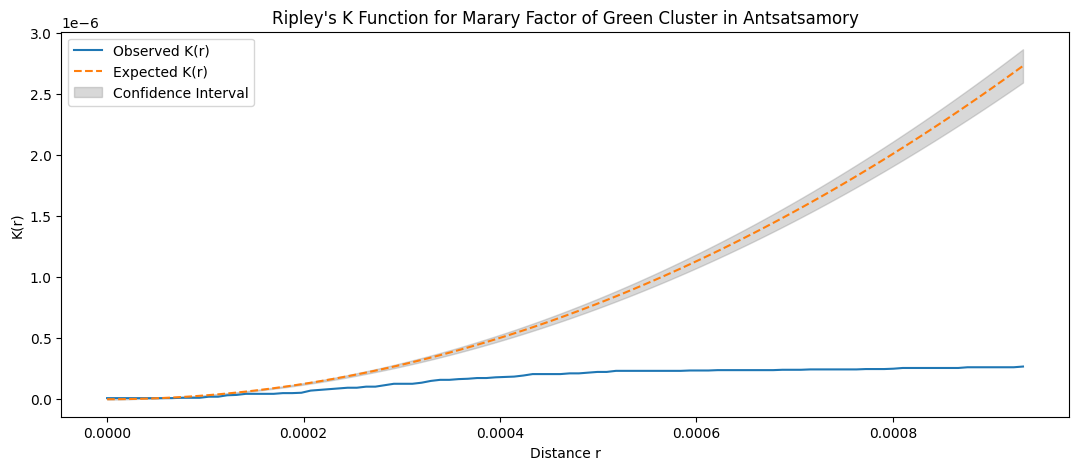

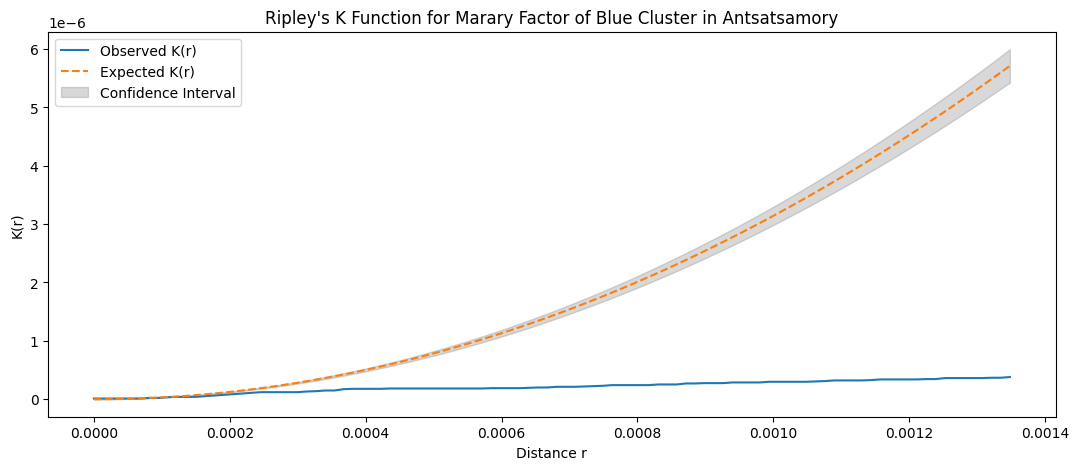

,Fokontany / PN,Marary factor,Longitude,Latitude,Cluster,Color
0,Antsatsamory,3.0,-22.01120,43.26045,0,Red
1,Antsatsamory,3.0,-22.01086,43.26011,0,Red
2,Antsatsamory,2.0,-22.01109,43.26175,1,Green
3,Antsatsamory,3.0,-22.01109,43.26175,1,Green
4,Antsatsamory,1.0,-22.01099,43.26181,1,Green
5,Antsatsamory,1.0,-22.01099,43.26181,1,Green
6,Antsatsamory,3.0,-22.01086,43.26192,1,Green
7,Antsatsamory,2.0,-22.01081,43.26200,1,Green
8,Antsatsamory,3.0,-22.01088,43.26212,1,Green
9,Antsatsamory,2.0,-22.01088,43.26212,1,Green


In [56]:
ripleys_K(Antsatsamory, 2)

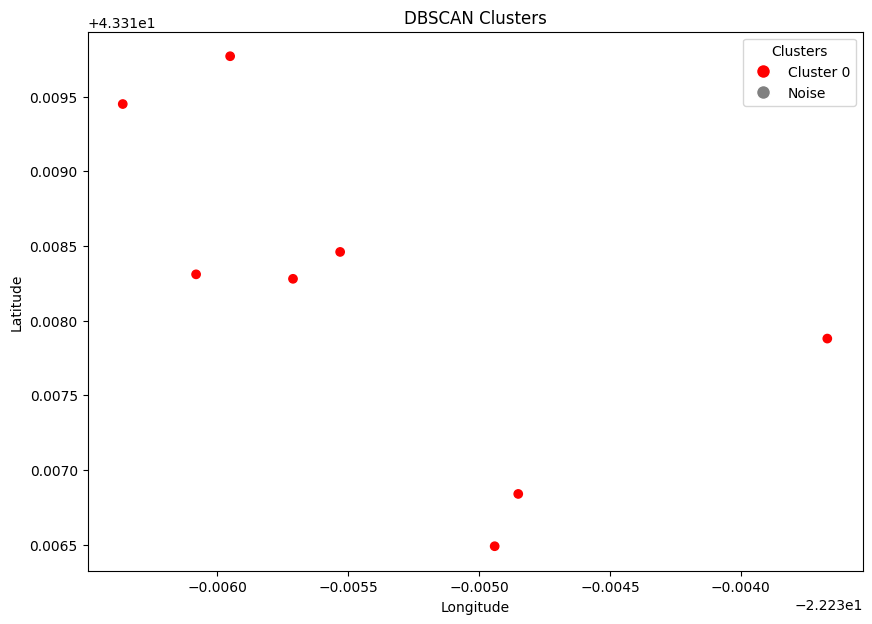

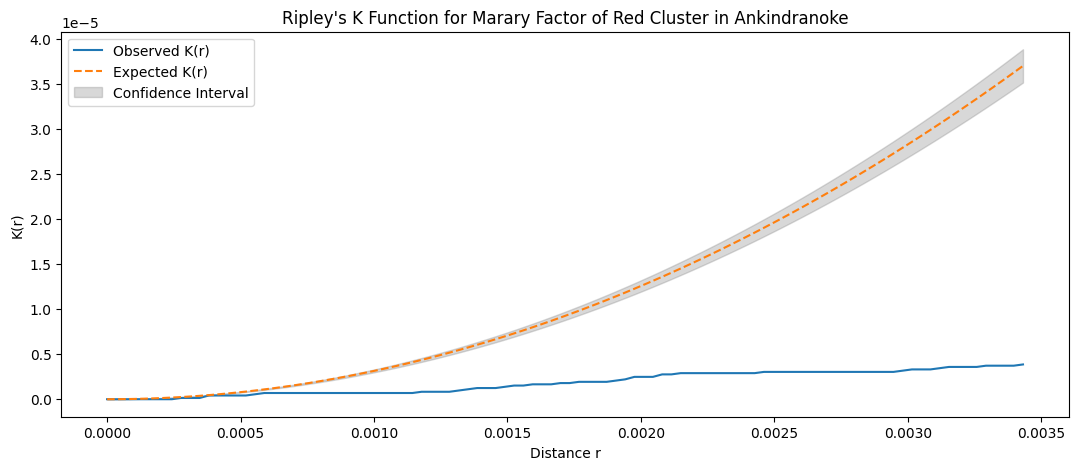

,Fokontany / PN,Marary factor,Longitude,Latitude,Cluster,Color
0,Ankindranoke,2.0,-22.23485,43.31684,0,Red
1,Ankindranoke,2.0,-22.23494,43.31649,0,Red
2,Ankindranoke,1.0,-22.23367,43.31788,0,Red
3,Ankindranoke,2.0,-22.23553,43.31846,0,Red
4,Ankindranoke,3.0,-22.23571,43.31828,0,Red
5,Ankindranoke,2.0,-22.23608,43.31831,0,Red
6,Ankindranoke,3.0,-22.23636,43.31945,0,Red
7,Ankindranoke,3.0,-22.23595,43.31977,0,Red


In [57]:
ripleys_K(Ankindranoke)

### Ripley's K Results:

The observed K(r) was lower than the expected K(r) in all clusters in all Fokontanies, indicating the marary patterns tend to be dispersed within every cluster of every Fokontany.


Note: Belavenoke and Akindranoke/Mikea Park are not included because neither contain any sampled instance of the marary pattern

## Zeta Diversity Analysis of Vegetation Species Per Fokontany

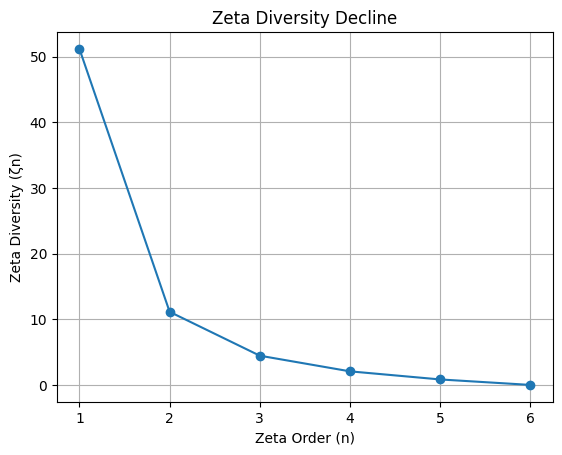

In [107]:
bab_beta = bab.loc[:, ["Fokontany / PN", "Surrounding vegetation"]].dropna()
bab_beta['Surrounding vegetation'] = bab_beta['Surrounding vegetation'].str.split(', ')
bab_beta = bab_beta.explode("Surrounding vegetation").drop_duplicates()  

matrix = pd.crosstab(bab_beta['Fokontany / PN'], bab_beta['Surrounding vegetation'])

# Number of villages
n_villages = len(matrix)

# Calculate zeta diversity for orders 1 to n_villages
zeta_diversities = [np.mean([matrix.loc[list(combo)].min(axis=0).sum() for combo in combinations(matrix.index, order)]) for order in range(1, n_villages + 1)]

# Plot the zeta diversity decline
plt.plot(range(1, n_villages + 1), zeta_diversities, marker='o')
plt.xlabel('Zeta Order (n)')
plt.ylabel('Zeta Diversity (ζn)')
plt.title('Zeta Diversity Decline')
plt.grid(True)
plt.show()

In [102]:
# Iterate through each zeta order
for order in range(1, len(matrix) + 1):
    print(f"\nZeta Order: {order}")
    
    # Generate and extract combinations of villages for the current zeta order
    for combo in combinations(matrix.index, order):
        # extract relevant rows from DataFrame for combination
        subset = matrix.loc[list(combo)]
        
        # species present selected villages 
        shared_species = subset.all(axis=0)
        shared_species_list = subset.columns[shared_species].tolist()
        num_shared_species = len(shared_species_list)
        
        display(f"Villages Compared: {combo}")
        display(f"Shared Species: {subset.columns[shared_species].tolist()}")
        display(f"Number of Shared Species: {num_shared_species}")


Zeta Order: 1


"Villages Compared: ('Ambalorao',)"

"Shared Species: ['anakarake', 'anarake', 'bangake', 'bolobolo', 'boy', 'bozake', 'fajihosy', 'famata', 'famonty', 'fampindy', 'fandrehosy', 'fandriandambo', 'fandrihosy', 'fanjihosy', 'fansiandambo', 'fatipatike', 'fatipaty', 'folafoty', 'hazamafinto', 'hazombalala', 'hazompasy', 'hazondrano', 'kantsakantsa', 'kapikala', 'katsamantse', 'kililo', 'kilily', 'kily', 'kisirasira', 'komokomoke', 'lairike', 'laro', 'lisinalika', 'lisinjere', 'lombiry', 'maharoake', 'maharohake', 'maharohake (used to clear sinuses)', 'maintimpo', 'mananike', 'mandravasavaroche', 'manoroke', 'matsake', 'nonokalika', 'nonoke', 'olamboay', 'plant in same family as komokomoke', 'plant that is same family as komokomoke', 'ragidrantsa', 'ranga', 'regedrantse', 'remontany', 'remotiny', 'sakoa', 'sambaratoake', 'sasave', 'satsasatsa', 'sekatse', 'sono', 'talafoty', 'talafoty (has spiny fruits)', 'tambazotse', 'taotao', 'tapisaky', 'tartarike', 'tiambaratoaka', 'toitoy', 'tsianbarakoa', 'tsingilo', 'tsipapolahe', 'ts

'Number of Shared Species: 82'

"Villages Compared: ('Andavadoaka',)"

"Shared Species: ['dry brush', 'komokomoke', 'laro', 'nonoka', 'sono']"

'Number of Shared Species: 5'

"Villages Compared: ('Ankindranoke',)"

"Shared Species: ['NS4', 'NS5', 'NS6', 'NS7', 'ambirotse', 'ampeny', 'andravala', 'antso', 'banake', 'bangake', 'betondro', 'bolobolo', 'boroboke', 'boy', 'boy mena', 'dingadinga', 'famainty', 'famaky', 'famata', 'fandrihosy', 'fany', 'farehitsy', 'fatikakoho', 'fatipatike', 'fatipaty', 'fengoke', 'halomboro', 'handy', 'hazafoty', 'hazamafinto', 'hazamanitse', 'hazifoty', 'hazofoty', 'hazomafinto', 'hazomanitse', 'hazomanitsy', 'hazombalala', 'hazombave', 'hazombavy', 'hazombenge', 'hazombengy', 'hazomby', 'hazomdambo', 'hazomena', 'hazomsakorova', 'hazondambo', 'hazondikotse', 'hazondrano', 'horobontsy (fatipatike)', 'karibo', 'karombola', 'katsafa', 'katsafay', 'katsamantse', 'kifafa', 'kikika', 'kilily', 'komokomoke', 'kopoke', 'laro', 'lengo', 'lingalinga', 'lisinjere', 'lisirere', 'mafangaletse', 'maintiampototse', 'maintimpo', 'maintimpototse', 'malimatse', 'manaritoloho', 'mandahoza', 'mangarahara', 'mantsintay', 'matsitay', 'monongo', 'nato', 'nonoka', 'nonoke', 'nonotandrake',

'Number of Shared Species: 121'

"Villages Compared: ('Ankindranoke / Mikea Park',)"

"Shared Species: ['andravilo', 'antso', 'bea', 'bolobolo', 'boy', 'fandrihosy', 'fany', 'fatipatike', 'halomboro', 'hazombavy', 'hazomby', 'hazy', 'kapaipoty', 'katsafa', 'katsafay', 'kidresy', 'kifafa', 'komokomoke', 'kotika', 'laro', 'latabarake', 'lengo', 'maintiampototse', 'maintimpototse', 'makonazy', 'raiketa', 'remoty', 'sanira', 'sekatse', 'somotsoy', 'sono', 'taly', 'totonga', 'tsingilo', 'tsipotsipoke', 'vaha', 'zaha']"

'Number of Shared Species: 37'

"Villages Compared: ('Antsatsamory',)"

"Shared Species: ['NS3', 'aloe', 'anakarake', 'bolobolo', 'boy', 'bozake', 'famata', 'famonty', 'fandrihosy', 'farehitsy', 'halimboay', 'hazondrano', 'katsafa', 'katsafay', 'kily', 'kisirasira', 'komokomoke', 'laro', 'laza', 'lisinalika', 'lisinjere', 'lombiry', 'mandave', 'manoroke', 'mataka', 'matsake', 'mokonazy', 'nonoka', 'nonokalika', 'nonoke', 'sakoa', 'sambaratoake', 'saomontsoy', 'sasave', 'satsasatsa', 'sekatse', 'something similar to nonokalika', 'somontsoy', 'sono', 'taotao', 'tapisaky', 'tifotifo', 'tsingilo', 'tsipapolahe', 'tsipotipoty', 'vaho', 'vantango', 'volofoty be', 'zaha']"

'Number of Shared Species: 49'

"Villages Compared: ('Belavenoke',)"

"Shared Species: ['aloe', 'antsy', 'boy', 'famata', 'famonty', 'kily', 'matsake', 'sangovihovy', 'sasave', 'satsesatse', 'sekatse', 'tangenbave', 'vantango']"

'Number of Shared Species: 13'


Zeta Order: 2


"Villages Compared: ('Ambalorao', 'Andavadoaka')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Ankindranoke')"

"Shared Species: ['bangake', 'bolobolo', 'boy', 'famata', 'fandrihosy', 'fatipatike', 'fatipaty', 'hazamafinto', 'hazombalala', 'hazondrano', 'katsamantse', 'kilily', 'komokomoke', 'laro', 'lisinjere', 'maintimpo', 'nonoke', 'ranga', 'sakoa', 'sambaratoake', 'sasave', 'satsasatsa', 'sekatse', 'sono', 'talafoty', 'tsipapolahe', 'vantango', 'volofoty', 'zaha']"

'Number of Shared Species: 29'

"Villages Compared: ('Ambalorao', 'Ankindranoke / Mikea Park')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'fatipatike', 'komokomoke', 'laro', 'sekatse', 'sono', 'tsingilo', 'zaha']"

'Number of Shared Species: 10'

"Villages Compared: ('Ambalorao', 'Antsatsamory')"

"Shared Species: ['anakarake', 'bolobolo', 'boy', 'bozake', 'famata', 'famonty', 'fandrihosy', 'hazondrano', 'kily', 'kisirasira', 'komokomoke', 'laro', 'lisinalika', 'lisinjere', 'lombiry', 'manoroke', 'matsake', 'nonokalika', 'nonoke', 'sakoa', 'sambaratoake', 'sasave', 'satsasatsa', 'sekatse', 'sono', 'taotao', 'tapisaky', 'tsingilo', 'tsipapolahe', 'vantango', 'zaha']"

'Number of Shared Species: 31'

"Villages Compared: ('Ambalorao', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'famonty', 'kily', 'matsake', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 8'

"Villages Compared: ('Andavadoaka', 'Ankindranoke')"

"Shared Species: ['komokomoke', 'laro', 'nonoka', 'sono']"

'Number of Shared Species: 4'

"Villages Compared: ('Andavadoaka', 'Ankindranoke / Mikea Park')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Andavadoaka', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'nonoka', 'sono']"

'Number of Shared Species: 4'

"Villages Compared: ('Andavadoaka', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ankindranoke', 'Ankindranoke / Mikea Park')"

"Shared Species: ['antso', 'bolobolo', 'boy', 'fandrihosy', 'fany', 'fatipatike', 'halomboro', 'hazombavy', 'hazomby', 'katsafa', 'katsafay', 'kifafa', 'komokomoke', 'laro', 'lengo', 'maintiampototse', 'maintimpototse', 'remoty', 'sekatse', 'somotsoy', 'sono', 'totonga', 'vaha', 'zaha']"

'Number of Shared Species: 24'

"Villages Compared: ('Ankindranoke', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'famata', 'fandrihosy', 'farehitsy', 'hazondrano', 'katsafa', 'katsafay', 'komokomoke', 'laro', 'lisinjere', 'nonoka', 'nonoke', 'sakoa', 'sambaratoake', 'sasave', 'satsasatsa', 'sekatse', 'sono', 'tifotifo', 'tsipapolahe', 'tsipotipoty', 'vantango', 'zaha']"

'Number of Shared Species: 24'

"Villages Compared: ('Ankindranoke', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 5'

"Villages Compared: ('Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'katsafa', 'katsafay', 'komokomoke', 'laro', 'sekatse', 'sono', 'tsingilo', 'zaha']"

'Number of Shared Species: 11'

"Villages Compared: ('Ankindranoke / Mikea Park', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Antsatsamory', 'Belavenoke')"

"Shared Species: ['aloe', 'boy', 'famata', 'famonty', 'kily', 'matsake', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 9'


Zeta Order: 3


"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke / Mikea Park')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Ankindranoke / Mikea Park')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'fatipatike', 'komokomoke', 'laro', 'sekatse', 'sono', 'zaha']"

'Number of Shared Species: 9'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'famata', 'fandrihosy', 'hazondrano', 'komokomoke', 'laro', 'lisinjere', 'nonoke', 'sakoa', 'sambaratoake', 'sasave', 'satsasatsa', 'sekatse', 'sono', 'tsipapolahe', 'vantango', 'zaha']"

'Number of Shared Species: 18'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 5'

"Villages Compared: ('Ambalorao', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'komokomoke', 'laro', 'sekatse', 'sono', 'tsingilo', 'zaha']"

'Number of Shared Species: 9'

"Villages Compared: ('Ambalorao', 'Ankindranoke / Mikea Park', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Ambalorao', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'famonty', 'kily', 'matsake', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 8'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'nonoka', 'sono']"

'Number of Shared Species: 4'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Andavadoaka', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Andavadoaka', 'Ankindranoke / Mikea Park', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Andavadoaka', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'katsafa', 'katsafay', 'komokomoke', 'laro', 'sekatse', 'sono', 'zaha']"

'Number of Shared Species: 10'

"Villages Compared: ('Ankindranoke', 'Ankindranoke / Mikea Park', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Ankindranoke', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 5'

"Villages Compared: ('Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'


Zeta Order: 4


"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke / Mikea Park', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['bolobolo', 'boy', 'fandrihosy', 'komokomoke', 'laro', 'sekatse', 'sono', 'zaha']"

'Number of Shared Species: 8'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'famata', 'sasave', 'sekatse', 'vantango']"

'Number of Shared Species: 5'

"Villages Compared: ('Ambalorao', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Andavadoaka', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'


Zeta Order: 5


"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory')"

"Shared Species: ['komokomoke', 'laro', 'sono']"

'Number of Shared Species: 3'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

"Villages Compared: ('Ambalorao', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

"Shared Species: ['boy', 'sekatse']"

'Number of Shared Species: 2'

"Villages Compared: ('Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'


Zeta Order: 6


"Villages Compared: ('Ambalorao', 'Andavadoaka', 'Ankindranoke', 'Ankindranoke / Mikea Park', 'Antsatsamory', 'Belavenoke')"

'Shared Species: []'

'Number of Shared Species: 0'

#### Results: 

- Ambalorao surprisingly has a more similar ecologolical community with every Fokontany except the one closest to it (Andavadoaka). It shares roughly 30 vegetation species with Akindranoke and Ansatsamory. 
- Andavadoaka shares roughly 3-4 vegetation species surrounding their baobabs with every other Fokontany.
- Akindranoke shares greater than 20 vegetation species with Ambalorao, Antsatsamory, and Akindranoke/Mikea Park.
- Antsatsamory shares greater than 10 vegetation species with every Fokontany exccept Andavadoaka. 
- Akindranoke shares more vegetation species with Ambalarao (29) than with Akindranoke/Mikea Park (24). 
- Belavenoke on average shares more vegetation species with every other Fokontany than Andavadoaka despite having only a single sample taken. 